# Recursive

In [1]:
import numpy as np

def P_R(C, W, P):
    global S
    if C < min(W):
        S[C] = 0
        return 0
    maxProfit = 0
    for i in range(len(W)):
        if C >= W[i]:
            Profit = P[i] + P_R(C-W[i], W, P)
            if Profit > maxProfit:
                maxProfit = Profit    
    S[C] = maxProfit
    return maxProfit

In [2]:
C = 14
W = [4,6,8]
P = [7,6,9]
S = [None]*(C+1)
print(P_R(C,W,P), S)

21 [0, None, 0, None, 7, None, 7, None, 14, None, 14, None, None, None, 21]


In [3]:
C = 14
W = [5,6,8]
P = [7,6,9]
S = [None]*(C+1)
print(P_R(C,W,P), S)

16 [0, 0, 0, 0, 0, None, 7, None, 9, 9, None, None, None, None, 16]


# Dynamic Programming Bottom Up

In [4]:
def P_DP_BU(C, W, P, S):
    start = min(W)
    for c in range(start):
        S[c] = 0
    for c in range(start, C+1):
        S[c] = 0
        for i in range(len(W)):
            if c>=W[i]:
                Profit = P[i] + S[c-W[i]]
                if Profit > S[c]:
                    S[c] = Profit
            
    return S[C], S

In [5]:
C = 14
W = [4,6,8]
P = [7,6,9]
S = [None]*(C+1)
print(P_DP_BU(C, W, P, S))

(21, [0, 0, 0, 0, 7, 7, 7, 7, 14, 14, 14, 14, 21, 21, 21])


In [6]:
C = 14
W = [5,6,8]
P = [7,6,9]
S = [None]*(C+1)
print(P_DP_BU(C, W, P, S))

(16, [0, 0, 0, 0, 0, 7, 7, 7, 9, 9, 14, 14, 14, 16, 16])


# Empirical 

In [81]:
import random
import matplotlib.pyplot as plt

def P_R_KC(C, W, P):
    global KC
    
    KC+=1
    if C < min(W):
        return 0
    maxProfit = 0
    for i in range(len(W)):
        KC+=1
        if C >= W[i]:
            Profit = P[i] + P_R_KC(C-W[i], W, P)
            KC+=1
            if Profit > maxProfit:
                maxProfit = Profit    
    return maxProfit

def P_DP_BU_KC(C, W, P):
    global KC
    S = [None]*(C+1)
    start = min(W)
    S[0] = 0
    for c in range(1, C+1):
        S[c] = 0
        for i in range(len(W)):
            KC+=1
            if c>=W[i]:
                Profit = P[i] + S[c-W[i]]
                KC+=1
                if Profit > S[c]:
                    S[c] = Profit
            
    return S[C]

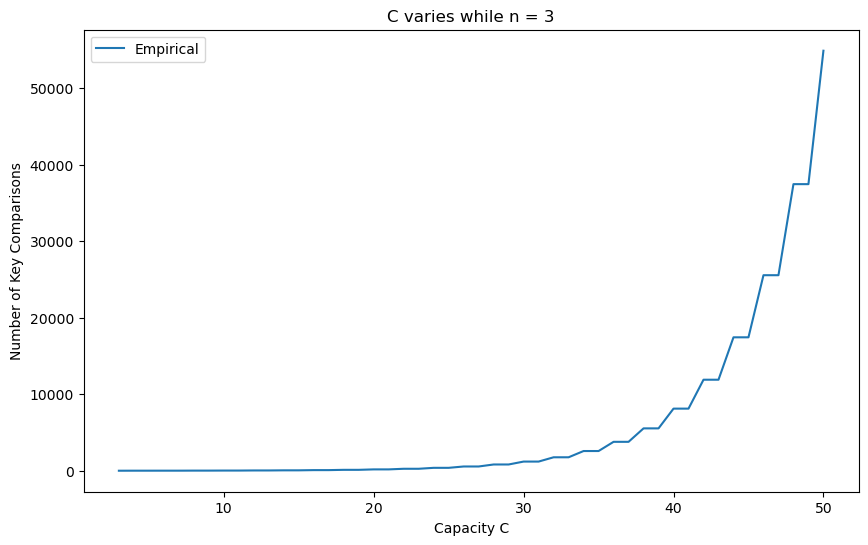

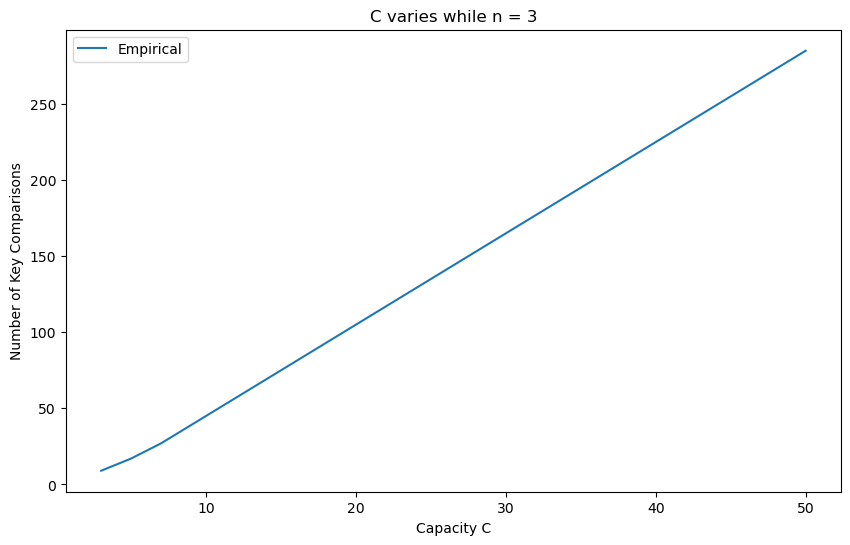

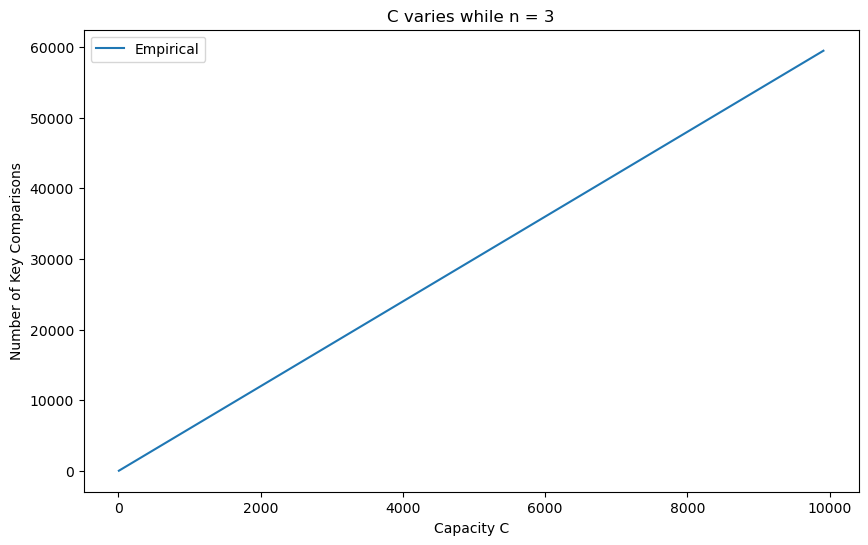

In [96]:
W = [4,6,8]
P = [7,6,9]
n = len(W)
CArr1 = np.arange(n,50+1,1)

KCArr1=[]
KCArr2=[]

for C in CArr1:
    KC = 0
    P_R_KC(C, W, P)
    KCArr1.append(KC)
    
    KC = 0
    P_DP_BU_KC(C, W, P)
    KCArr2.append(KC)
    
plt.figure(figsize=(10,6))
plt.plot(CArr1, KCArr1, label = "Empirical")
plt.xlabel("Capacity C")
plt.ylabel("Number of Key Comparisons")
plt.title("C varies while n = {}".format(n))
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(CArr1, KCArr2, label = "Empirical")
plt.xlabel("Capacity C")
plt.ylabel("Number of Key Comparisons")
plt.title("C varies while n = {}".format(n))
plt.legend()
plt.show()

CArr2 = np.arange(10,10000+1,100)
KCArr2=[]
for C in CArr2:
    KC = 0
    P_DP_BU_KC(C, W, P)
    KCArr2.append(KC)
    
plt.figure(figsize=(10,6))
plt.plot(CArr2, KCArr2, label = "Empirical")
plt.xlabel("Capacity C")
plt.ylabel("Number of Key Comparisons")
plt.title("C varies while n = {}".format(n))
plt.legend()
plt.show()

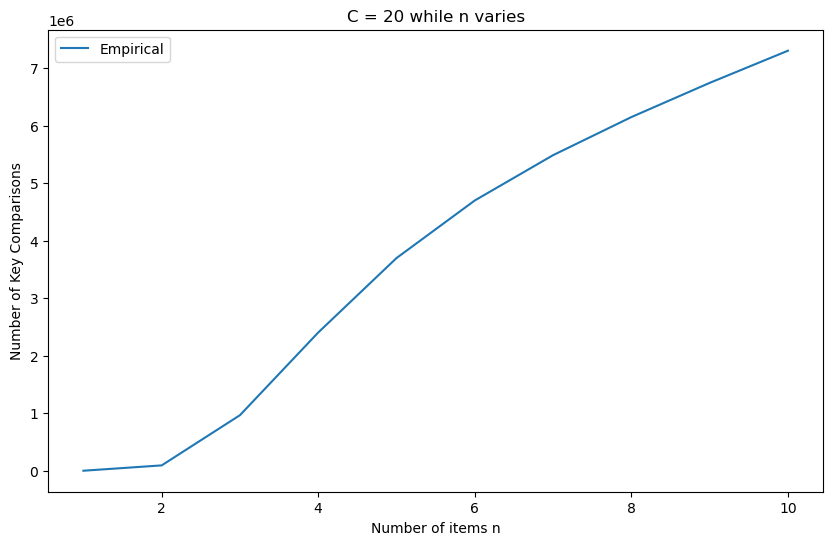

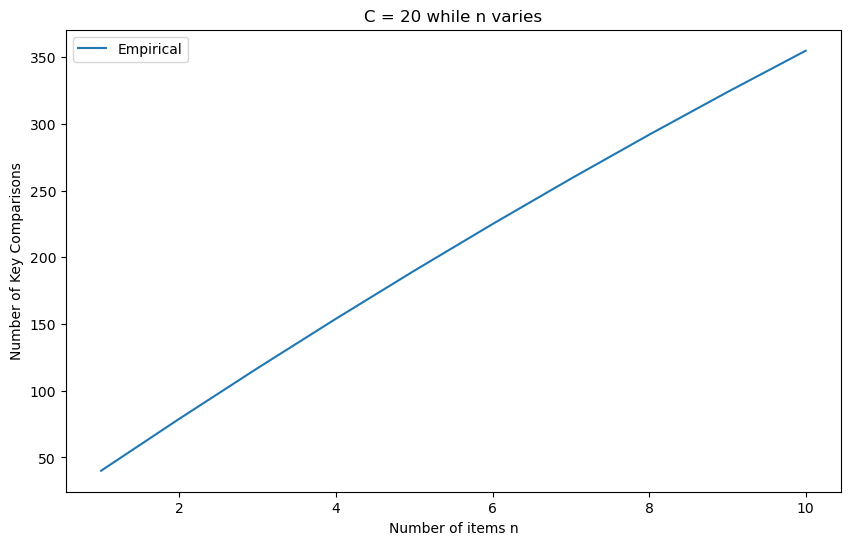

In [110]:
C = 20
nArr = np.arange(1,10+1,1)
W = []
P = []
for n in nArr:
    W.append(n)
    P.append(n)

KCArr1=[]
KCArr2=[]

for n in nArr:
    KC = 0
    P_R_KC(C, W[0:n], P[0:n])
    KCArr1.append(KC)
    
    KC = 0
    P_DP_BU_KC(C, W[0:n], P[0:n])
    KCArr2.append(KC)
    
plt.figure(figsize=(10,6))
plt.plot(nArr, KCArr1, label = "Empirical")
plt.xlabel("Number of items n")
plt.ylabel("Number of Key Comparisons")
plt.title("C = {} while n varies".format(C))
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(nArr, KCArr2, label = "Empirical")
plt.xlabel("Number of items n")
plt.ylabel("Number of Key Comparisons")
plt.title("C = {} while n varies".format(C))
plt.legend()
plt.show()

# Track Items

In [7]:
def print_item(item):
    for entries in item:
        print(entries)
    
def init_item(item, C):
    for i in range(len(item)):
        item[i][C] = 0
        
def update_item(item, C, W, i):
    item[i][C] = item[i][C-W[i]] + 1

In [8]:
def P_R_item(C, W, P):
    global S
    global item
    init_item(item, C)
    
    if C < min(W):
        S[C] = 0
        return 0
    maxProfit = 0
    for i in range(len(W)):
        if C >= W[i]:
            Profit = P[i] + P_R_item(C-W[i], W, P)
            if Profit > maxProfit:
                maxProfit = Profit
                update_item(item, C, W, i)
    S[C] = maxProfit
    return maxProfit

In [9]:
C = 14
W = [4,6,8]
P = [7,6,9]
S = [None]*(C+1)
item = [[None]*(C+1) for i in range(len(W))]
print(P_R_item(C,W,P))
print(S)
print_item(item)

21
[0, None, 0, None, 7, None, 7, None, 14, None, 14, None, None, None, 21]
[0, None, 0, None, 1, None, 1, None, 2, None, 2, None, None, None, 3]
[0, None, 0, None, 0, None, 0, None, 0, None, 0, None, None, None, 0]
[0, None, 0, None, 0, None, 0, None, 0, None, 0, None, None, None, 0]


In [10]:
C = 14
W = [5,6,8]
P = [7,6,9]
S = [None]*(C+1)
item = [[None]*(C+1) for i in range(len(W))]
print(P_R_item(C,W,P))
print(S)
print_item(item)

16
[0, 0, 0, 0, 0, None, 7, None, 9, 9, None, None, None, None, 16]
[0, 0, 0, 0, 0, None, 1, None, 1, 1, None, None, None, None, 2]
[0, 0, 0, 0, 0, None, 0, None, 0, 0, None, None, None, None, 0]
[0, 0, 0, 0, 0, None, 0, None, 1, 1, None, None, None, None, 0]


In [11]:
def P_DP_BU_item(C, W, P, S, item):
    start = min(W)
    for c in range(start):
        S[c] = 0
        init_item(item, c)
    for c in range(start, C+1):
        S[c] = 0
        init_item(item, c)
        for i in range(len(W)):
            if c>=W[i]:
                Profit = P[i] + S[c-W[i]]
                if Profit > S[c]:
                    S[c] = Profit
                    update_item(item, c, W, i)
    return S[C], S, item

In [12]:
C = 14
W = [4,6,8]
P = [7,6,9]
S = [None]*(C+1)
item = [[None]*(C+1) for i in range(len(W))]
maxProfit, S, item = P_DP_BU_item(C,W,P,S,item)
print(maxProfit)
print(S)
print_item(item)

21
[0, 0, 0, 0, 7, 7, 7, 7, 14, 14, 14, 14, 21, 21, 21]
[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
C = 14
W = [5,6,8]
P = [7,6,9]
S = [None]*(C+1)
item = [[None]*(C+1) for i in range(len(W))]
maxProfit, S, item = P_DP_BU_item(C,W,P,S,item)
print(maxProfit)
print(S)
print_item(item)

16
[0, 0, 0, 0, 0, 7, 7, 7, 9, 9, 14, 14, 14, 16, 16]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
